# 作业

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## 一、小麦种类预测

读取seeds.tsv文件，最后一列是小麦品种，其他列是小麦特征

In [4]:
seeds = pd.read_csv('../data/seeds.tsv',sep='\t',names=['A','B','C','D','E','F','G','H'])

In [5]:
seeds

A      B       C      D      E       F      G         H
0    15.26  14.84  0.8710  5.763  3.312  2.2210  5.220      Kama
1    14.88  14.57  0.8811  5.554  3.333  1.0180  4.956      Kama
2    14.29  14.09  0.9050  5.291  3.337  2.6990  4.825      Kama
3    13.84  13.94  0.8955  5.324  3.379  2.2590  4.805      Kama
4    16.14  14.99  0.9034  5.658  3.562  1.3550  5.175      Kama
5    14.38  14.21  0.8951  5.386  3.312  2.4620  4.956      Kama
6    14.69  14.49  0.8799  5.563  3.259  3.5860  5.219      Kama
7    14.11  14.10  0.8911  5.420  3.302  2.7000  5.000      Kama
8    16.63  15.46  0.8747  6.053  3.465  2.0400  5.877      Kama
9    16.44  15.25  0.8880  5.884  3.505  1.9690  5.533      Kama
10   15.26  14.85  0.8696  5.714  3.242  4.5430  5.314      Kama
11   14.03  14.16  0.8796  5.438  3.201  1.7170  5.001      Kama
12   13.89  14.02  0.8880  5.439  3.199  3.9860  4.738      Kama
13   13.78  14.06  0.8759  5.479  3.156  3.1360  4.872      Kama
14   13.74  14.05  0.8744  5.482  3.114  2.9320  4.825      Kama
15   14.59  14.28  0.8993  5.351  3.333  4.1850  4.781      Kama
16   13.99  13.83  0.9183  5.119  3.383  5.2340  4.781      Kama
17   15.69  14.75  0.9058  5.527  3.514  1.5990  5.046      Kama
18   14.70  14.21  0.9153  5.205  3.466  1.7670  4.649      Kama
19   12.72  13.57  0.8686  5.226  3.049  4.1020  4.914      Kama
20   14.16  14.40  0.8584  5.658  3.129  3.0720  5.176      Kama
21   14.11  14.26  0.8722  5.520  3.168  2.6880  5.219      Kama
22   15.88  14.90  0.8988  5.618  3.507  0.7651  5.091      Kama
23   12.08  13.23  0.8664  5.099  2.936  1.4150  4.961      Kama
24   15.01  14.76  0.8657  5.789  3.245  1.7910  5.001      Kama
25   16.19  15.16  0.8849  5.833  3.421  0.9030  5.307      Kama
26   13.02  13.76  0.8641  5.395  3.026  3.3730  4.825      Kama
27   12.74  13.67  0.8564  5.395  2.956  2.5040  4.869      Kama
28   14.11  14.18  0.8820  5.541  3.221  2.7540  5.038      Kama
29   13.45  14.02  0.8604  5.516  3.065  3.5310  5.097      Kama
..     ...    ...     ...    ...    ...     ...    ...       ...
180  11.41  12.95  0.8560  5.090  2.775  4.9570  4.825  Canadian
181  12.46  13.41  0.8706  5.236  3.017  4.9870  5.147  Canadian
182  12.19  13.36  0.8579  5.240  2.909  4.8570  5.158  Canadian
183  11.65  13.07  0.8575  5.108  2.850  5.2090  5.135  Canadian
184  12.89  13.77  0.8541  5.495  3.026  6.1850  5.316  Canadian
185  11.56  13.31  0.8198  5.363  2.683  4.0620  5.182  Canadian
186  11.81  13.45  0.8198  5.413  2.716  4.8980  5.352  Canadian
187  10.91  12.80  0.8372  5.088  2.675  4.1790  4.956  Canadian
188  11.23  12.82  0.8594  5.089  2.821  7.5240  4.957  Canadian
189  10.59  12.41  0.8648  4.899  2.787  4.9750  4.794  Canadian
190  10.93  12.80  0.8390  5.046  2.717  5.3980  5.045  Canadian
191  11.27  12.86  0.8563  5.091  2.804  3.9850  5.001  Canadian
192  11.87  13.02  0.8795  5.132  2.953  3.5970  5.132  Canadian
193  10.82  12.83  0.8256  5.180  2.630  4.8530  5.089  Canadian
194  12.11  13.27  0.8639  5.236  2.975  4.1320  5.012  Canadian
195  12.80  13.47  0.8860  5.160  3.126  4.8730  4.914  Canadian
196  12.79  13.53  0.8786  5.224  3.054  5.4830  4.958  Canadian
197  13.37  13.78  0.8849  5.320  3.128  4.6700  5.091  Canadian
198  12.62  13.67  0.8481  5.410  2.911  3.3060  5.231  Canadian
199  12.76  13.38  0.8964  5.073  3.155  2.8280  4.830  Canadian
200  12.38  13.44  0.8609  5.219  2.989  5.4720  5.045  Canadian
201  12.67  13.32  0.8977  4.984  3.135  2.3000  4.745  Canadian
202  11.18  12.72  0.8680  5.009  2.810  4.0510  4.828  Canadian
203  12.70  13.41  0.8874  5.183  3.091  8.4560  5.000  Canadian
204  12.37  13.47  0.8567  5.204  2.960  3.9190  5.001  Canadian
205  12.19  13.20  0.8783  5.137  2.981  3.6310  4.870  Canadian
206  11.23  12.88  0.8511  5.140  2.795  4.3250  5.003  Canadian
207  13.20  13.66  0.8883  5.236  3.232  8.3150  5.056  Canadian
208  11.84  13.21  0.8521  5.175  2.836  3.5980  5.044  Canadian
209  12.30  13.34  0.8684  5.243  2.974  5.6

In [6]:
seeds.shape

(210, 8)

In [7]:
data = seeds.values[:,0:-1]
data

array([[15.26, 14.84, 0.871, ..., 3.312, 2.221, 5.22],
       [14.88, 14.57, 0.8811, ..., 3.333, 1.018, 4.956],
       [14.29, 14.09, 0.905, ..., 3.3369999999999997, 2.699, 4.825],
       ...,
       [13.2, 13.66, 0.8883, ..., 3.2319999999999998, 8.315, 5.056],
       [11.84, 13.21, 0.8521, ..., 2.8360000000000003,
        3.5980000000000003, 5.044],
       [12.3, 13.34, 0.8684, ..., 2.9739999999999998, 5.6370000000000005,
        5.063]], dtype=object)

In [8]:
data.shape

(210, 7)

In [9]:
kinds = seeds.values[:,-1]
kinds

array(['Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
      

In [10]:
kinds.shape

(210,)

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(data,kinds,test_size=0.2)

In [12]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((168, 7), (42, 7), (168,), (42,))

In [13]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
y_=knn.predict(X_test)
y_

array(['Rosa', 'Canadian', 'Canadian', 'Kama', 'Canadian', 'Canadian',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Canadian', 'Kama', 'Kama',
       'Canadian', 'Canadian', 'Canadian', 'Canadian', 'Canadian', 'Kama',
       'Kama', 'Canadian', 'Canadian', 'Canadian', 'Kama', 'Canadian',
       'Kama', 'Canadian', 'Rosa', 'Canadian', 'Rosa', 'Kama', 'Canadian',
       'Canadian', 'Canadian', 'Kama', 'Kama', 'Canadian', 'Rosa', 'Kama',
       'Kama', 'Rosa', 'Rosa'], dtype=object)

In [15]:
Y_test

array(['Rosa', 'Canadian', 'Kama', 'Kama', 'Canadian', 'Canadian', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Canadian', 'Kama', 'Kama', 'Canadian',
       'Canadian', 'Canadian', 'Canadian', 'Canadian', 'Kama', 'Kama',
       'Kama', 'Canadian', 'Canadian', 'Kama', 'Canadian', 'Rosa',
       'Canadian', 'Rosa', 'Canadian', 'Rosa', 'Kama', 'Canadian',
       'Canadian', 'Canadian', 'Kama', 'Kama', 'Canadian', 'Rosa', 'Kama',
       'Kama', 'Rosa', 'Rosa'], dtype=object)

In [16]:
knn.score(X_test,Y_test)

0.9285714285714286

In [17]:
knn.score(X_train,Y_train)

0.9166666666666666

In [18]:
df=pd.DataFrame(data=data)
df

0      1       2      3      4       5      6
0    15.26  14.84   0.871  5.763  3.312   2.221   5.22
1    14.88  14.57  0.8811  5.554  3.333   1.018  4.956
2    14.29  14.09   0.905  5.291  3.337   2.699  4.825
3    13.84  13.94  0.8955  5.324  3.379   2.259  4.805
4    16.14  14.99  0.9034  5.658  3.562   1.355  5.175
5    14.38  14.21  0.8951  5.386  3.312   2.462  4.956
6    14.69  14.49  0.8799  5.563  3.259   3.586  5.219
7    14.11   14.1  0.8911   5.42  3.302     2.7      5
8    16.63  15.46  0.8747  6.053  3.465    2.04  5.877
9    16.44  15.25   0.888  5.884  3.505   1.969  5.533
10   15.26  14.85  0.8696  5.714  3.242   4.543  5.314
11   14.03  14.16  0.8796  5.438  3.201   1.717  5.001
12   13.89  14.02   0.888  5.439  3.199   3.986  4.738
13   13.78  14.06  0.8759  5.479  3.156   3.136  4.872
14   13.74  14.05  0.8744  5.482  3.114   2.932  4.825
15   14.59  14.28  0.8993  5.351  3.333   4.185  4.781
16   13.99  13.83  0.9183  5.119  3.383   5.234  4.781
17   15.69  14.75  0.9058  5.527  3.514   1.599  5.046
18    14.7  14.21  0.9153  5.205  3.466   1.767  4.649
19   12.72  13.57  0.8686  5.226  3.049   4.102  4.914
20   14.16   14.4  0.8584  5.658  3.129   3.072  5.176
21   14.11  14.26  0.8722   5.52  3.168   2.688  5.219
22   15.88   14.9  0.8988  5.618  3.507  0.7651  5.091
23   12.08  13.23  0.8664  5.099  2.936   1.415  4.961
24   15.01  14.76  0.8657  5.789  3.245   1.791  5.001
25   16.19  15.16  0.8849  5.833  3.421   0.903  5.307
26   13.02  13.76  0.8641  5.395  3.026   3.373  4.825
27   12.74  13.67  0.8564  5.395  2.956   2.504  4.869
28   14.11  14.18   0.882  5.541  3.221   2.754  5.038
29   13.45  14.02  0.8604  5.516  3.065   3.531  5.097
..     ...    ...     ...    ...    ...     ...    ...
180  11.41  12.95   0.856   5.09  2.775   4.957  4.825
181  12.46  13.41  0.8706  5.236  3.017   4.987  5.147
182  12.19  13.36  0.8579   5.24  2.909   4.857  5.158
183  11.65  13.07  0.8575  5.108   2.85   5.209  5.135
184  12.89  13.77  0.8541  5.495  3.026   6.185  5.316
185  11.56  13.31  0.8198  5.363  2.683   4.062  5.182
186  11.81  13.45  0.8198  5.413  2.716   4.898  5.352
187  10.91   12.8  0.8372  5.088  2.675   4.179  4.956
188  11.23  12.82  0.8594  5.089  2.821   7.524  4.957
189  10.59  12.41  0.8648  4.899  2.787   4.975  4.794
190  10.93   12.8   0.839  5.046  2.717   5.398  5.045
191  11.27  12.86  0.8563  5.091  2.804   3.985  5.001
192  11.87  13.02  0.8795  5.132  2.953   3.597  5.132
193  10.82  12.83  0.8256   5.18   2.63   4.853  5.089
194  12.11  13.27  0.8639  5.236  2.975   4.132  5.012
195   12.8  13.47   0.886   5.16  3.126   4.873  4.914
196  12.79  13.53  0.8786  5.224  3.054   5.483  4.958
197  13.37  13.78  0.8849   5.32  3.128    4.67  5.091
198  12.62  13.67  0.8481   5.41  2.911   3.306  5.231
199  12.76  13.38  0.8964  5.073  3.155   2.828   4.83
200  12.38  13.44  0.8609  5.219  2.989   5.472  5.045
201  12.67  13.32  0.8977  4.984  3.135     2.3  4.745
202  11.18  12.72   0.868  5.009   2.81   4.051  4.828
203   12.7  13.41  0.8874  5.183  3.091   8.456      5
204  12.37  13.47  0.8567  5.204   2.96   3.919  5.001
205  12.19   13.2  0.8783  5.137  2.981   3.631   4.87
206  11.23  12.88  0.8511   5.14  2.795   4.325  5.003
207   13.2  13.66  0.8883  5.236  3.232   8.315  5.056
208  11.84  13.21  0.8521  5.175  2.836   3.598  5.044
209   12.3  13.34  0.8684  5.243  2.974   5.637  5.063

[210 rows x 7 columns]

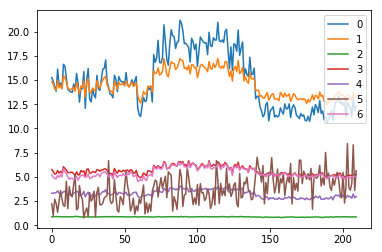

In [19]:
df.plot()

In [20]:
data

array([[15.26, 14.84, 0.871, ..., 3.312, 2.221, 5.22],
       [14.88, 14.57, 0.8811, ..., 3.333, 1.018, 4.956],
       [14.29, 14.09, 0.905, ..., 3.3369999999999997, 2.699, 4.825],
       ...,
       [13.2, 13.66, 0.8883, ..., 3.2319999999999998, 8.315, 5.056],
       [11.84, 13.21, 0.8521, ..., 2.8360000000000003,
        3.5980000000000003, 5.044],
       [12.3, 13.34, 0.8684, ..., 2.9739999999999998, 5.6370000000000005,
        5.063]], dtype=object)

In [21]:
data=data[:,2:5]
data

array([[0.871, 5.763, 3.312],
       [0.8811, 5.553999999999999, 3.333],
       [0.905, 5.291, 3.3369999999999997],
       [0.8955, 5.324, 3.3789999999999996],
       [0.9034, 5.6579999999999995, 3.562],
       [0.8951, 5.386, 3.312],
       [0.8799, 5.563, 3.259],
       [0.8911, 5.42, 3.302],
       [0.8747, 6.053, 3.465],
       [0.888, 5.8839999999999995, 3.505],
       [0.8696, 5.7139999999999995, 3.242],
       [0.8796, 5.438, 3.201],
       [0.888, 5.439, 3.199],
       [0.8759, 5.479, 3.156],
       [0.8744, 5.482, 3.114],
       [0.8993, 5.351, 3.333],
       [0.9183, 5.119, 3.383],
       [0.9058, 5.527, 3.514],
       [0.9153, 5.205, 3.466],
       [0.8686, 5.226, 3.049],
       [0.8584, 5.6579999999999995, 3.1289999999999996],
       [0.8722, 5.52, 3.168],
       [0.8988, 5.617999999999999, 3.5069999999999997],
       [0.8664, 5.099, 2.9360000000000004],
       [0.8657, 5.789, 3.245],
       [0.8849, 5.832999999999999, 3.4210000000000003],
       [0.8641, 5.395, 3.026000000

In [22]:
kinds

array(['Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
      

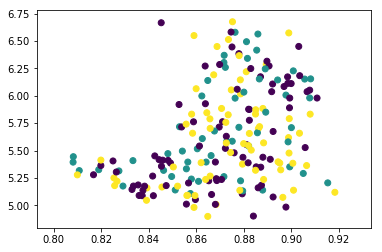

In [94]:
plt.scatter(data[:,0],data[:,1])
# plt.scatter(data[:,0],data[:,2],c='g')

## 二、改进约会网站的匹配效果

读取datingTestSet.txt文件，最后一列是喜欢程度。模型：根据前几列的信息，预测喜欢程度

In [127]:
dating = pd.read_csv('../data/datingTestSet.txt',sep='\t',names=['A','B','C','D'])
dating

A          B         C           D
0    40920   8.326976  0.953952  largeDoses
1    14488   7.153469  1.673904  smallDoses
2    26052   1.441871  0.805124   didntLike
3    75136  13.147394  0.428964   didntLike
4    38344   1.669788  0.134296   didntLike
5    72993  10.141740  1.032955   didntLike
6    35948   6.830792  1.213192  largeDoses
7    42666  13.276369  0.543880  largeDoses
8    67497   8.631577  0.749278   didntLike
9    35483  12.273169  1.508053  largeDoses
10   50242   3.723498  0.831917   didntLike
11   63275   8.385879  1.669485   didntLike
12    5569   4.875435  0.728658  smallDoses
13   51052   4.680098  0.625224   didntLike
14   77372  15.299570  0.331351   didntLike
15   43673   1.889461  0.191283   didntLike
16   61364   7.516754  1.269164   didntLike
17   69673  14.239195  0.261333   didntLike
18   15669   0.000000  1.250185  smallDoses
19   28488  10.528555  1.304844  largeDoses
20    6487   3.540265  0.822483  smallDoses
21   37708   2.991551  0.833920   didntLike
22   22620   5.297865  0.638306  smallDoses
23   28782   6.593803  0.187108  largeDoses
24   19739   2.816760  1.686209  smallDoses
25   36788  12.458258  0.649617  largeDoses
26    5741   0.000000  1.656418  smallDoses
27   28567   9.968648  0.731232  largeDoses
28    6808   1.364838  0.640103  smallDoses
29   41611   0.230453  1.151996   didntLike
..     ...        ...       ...         ...
970  53711  12.149747  1.389088  largeDoses
971  64371   9.149678  0.874905   didntLike
972   9289   9.666576  1.370330  smallDoses
973  60613   3.620110  0.287767   didntLike
974  18338   5.238800  1.253646  smallDoses
975  22845  14.715782  1.503758  largeDoses
976  74676  14.445740  1.211160   didntLike
977  34143  13.609528  0.364240  largeDoses
978  14153   3.141585  0.424280  smallDoses
979   9327   0.000000  0.120947  smallDoses
980  18991   0.454750  1.033280  smallDoses
981   9193   0.510310  0.016395  smallDoses
982   2285   3.864171  0.616349  smallDoses
983   9493   6.724021  0.563044  smallDoses
984   2371   4.289375  0.012563  smallDoses
985  13963   0.000000  1.437030  smallDoses
986   2299   3.733617  0.698269  smallDoses
987   5262   2.002589  1.380184  smallDoses
988   4659   2.502627  0.184223  smallDoses
989  17582   6.382129  0.876581  smallDoses
990  27750   8.546741  0.128706  largeDoses
991   9868   2.694977  0.432818  smallDoses
992  18333   3.951256  0.333300  smallDoses
993   3780   9.856183  0.329181  smallDoses
994  18190   2.068962  0.429927  smallDoses
995  11145   3.410627  0.631838  smallDoses
996  68846   9.974715  0.669787   didntLike
997  26575  10.650102  0.866627  largeDoses
998  48111   9.134528  0.728045  largeDoses
999  43757   7.882601  1.332446  largeDoses

[1000 rows x 4 columns]

In [128]:
data = dating[['A','B','C']].values
data

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [129]:
like = dating['D'].values
like

array(['largeDoses', 'smallDoses', 'didntLike', 'didntLike', 'didntLike',
       'didntLike', 'largeDoses', 'largeDoses', 'didntLike', 'largeDoses',
       'didntLike', 'didntLike', 'smallDoses', 'didntLike', 'didntLike',
       'didntLike', 'didntLike', 'didntLike', 'smallDoses', 'largeDoses',
       'smallDoses', 'didntLike', 'smallDoses', 'largeDoses',
       'smallDoses', 'largeDoses', 'smallDoses', 'largeDoses',
       'smallDoses', 'didntLike', 'largeDoses', 'didntLike', 'largeDoses',
       'didntLike', 'smallDoses', 'didntLike', 'didntLike', 'smallDoses',
       'largeDoses', 'largeDoses', 'didntLike', 'smallDoses',
       'largeDoses', 'largeDoses', 'largeDoses', 'didntLike', 'didntLike',
       'didntLike', 'didntLike', 'smallDoses', 'smallDoses', 'didntLike',
       'largeDoses', 'smallDoses', 'smallDoses', 'smallDoses',
       'smallDoses', 'largeDoses', 'didntLike', 'smallDoses', 'didntLike',
       'smallDoses', 'smallDoses', 'smallDoses', 'smallDoses',
       'smallDoses

In [130]:
X_train,X_test,Y_train,Y_test=train_test_split(data,like,test_size=0.2)

In [131]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [132]:
y_=knn.predict(X_test)
y_

array(['largeDoses', 'didntLike', 'smallDoses', 'largeDoses',
       'largeDoses', 'largeDoses', 'largeDoses', 'smallDoses',
       'largeDoses', 'largeDoses', 'didntLike', 'smallDoses', 'didntLike',
       'largeDoses', 'smallDoses', 'largeDoses', 'largeDoses',
       'didntLike', 'smallDoses', 'smallDoses', 'smallDoses', 'didntLike',
       'smallDoses', 'didntLike', 'largeDoses', 'largeDoses', 'didntLike',
       'largeDoses', 'largeDoses', 'didntLike', 'largeDoses',
       'largeDoses', 'largeDoses', 'smallDoses', 'didntLike',
       'smallDoses', 'smallDoses', 'largeDoses', 'didntLike', 'didntLike',
       'didntLike', 'smallDoses', 'didntLike', 'largeDoses', 'largeDoses',
       'smallDoses', 'didntLike', 'didntLike', 'didntLike', 'smallDoses',
       'didntLike', 'smallDoses', 'smallDoses', 'smallDoses',
       'largeDoses', 'largeDoses', 'smallDoses', 'smallDoses',
       'didntLike', 'largeDoses', 'didntLike', 'largeDoses', 'largeDoses',
       'smallDoses', 'smallDoses', 'sma

In [133]:
knn.score(X_test,Y_test)

0.785

In [134]:
knn.score(X_train,Y_train)

0.86125

In [135]:
df = pd.DataFrame(data=data)

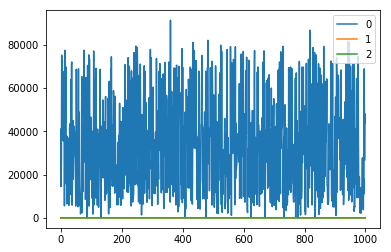

In [136]:
df.plot()

In [137]:
color=np.random.randint(0,3,210)

In [138]:
like

array(['largeDoses', 'smallDoses', 'didntLike', 'didntLike', 'didntLike',
       'didntLike', 'largeDoses', 'largeDoses', 'didntLike', 'largeDoses',
       'didntLike', 'didntLike', 'smallDoses', 'didntLike', 'didntLike',
       'didntLike', 'didntLike', 'didntLike', 'smallDoses', 'largeDoses',
       'smallDoses', 'didntLike', 'smallDoses', 'largeDoses',
       'smallDoses', 'largeDoses', 'smallDoses', 'largeDoses',
       'smallDoses', 'didntLike', 'largeDoses', 'didntLike', 'largeDoses',
       'didntLike', 'smallDoses', 'didntLike', 'didntLike', 'smallDoses',
       'largeDoses', 'largeDoses', 'didntLike', 'smallDoses',
       'largeDoses', 'largeDoses', 'largeDoses', 'didntLike', 'didntLike',
       'didntLike', 'didntLike', 'smallDoses', 'smallDoses', 'didntLike',
       'largeDoses', 'smallDoses', 'smallDoses', 'smallDoses',
       'smallDoses', 'largeDoses', 'didntLike', 'smallDoses', 'didntLike',
       'smallDoses', 'smallDoses', 'smallDoses', 'smallDoses',
       'smallDoses

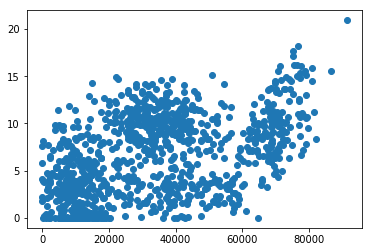

In [140]:
plt.scatter(data[:,0],data[:,1])